<a href="https://colab.research.google.com/github/Mileej/predicciones-de-ventas-alimenticias/blob/main/Proyecto1_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 

1. Leer archivo

In [2]:
dt=pd.read_csv('/content/drive/MyDrive/Semestre 2022-2/CODING_DOJO_DS/semana 1/sales_predictions.csv')
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
dt.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
#descripción de la base de datos general 
dt.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


1. ¿Cuántas filas y columnas?

In [5]:
dt.shape
#tenemos 8523 filas y 12 columnas 

(8523, 12)

2. ¿Cuáles son los tipos de datos en cada variable?

In [6]:
dt.dtypes
#Tenemos 2 tipos de datos: float y string

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [7]:
dt.duplicated().sum() 
#en esta base de datos no tenemos duplicados

0

4. Identifiquen los valores faltantes.

In [8]:
dt.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Vemos que la columna 2 tiene varios faltantes

5. Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección)

In [9]:
#la columna 2 que corresponde al peso del producto presenta faltantes, 
#primero veamos que porcentaje de faltante tiene respecto al total 
t=8523 #total de filas 
i_weigth=1463/t
print(i_weigth*100) #tenemos un total de faltantes del 17%

17.165317376510618


In [10]:
#criterio: procederemos a llenar con la media de los datos por dos razones: 
#1. Tiene valores de tipo float
#2. Tiene un porcentaje faltante <20%
promedio=dt['Item_Weight'].mean()
dt['Item_Weight'].fillna(promedio,inplace=True)

 6. Confirmen que no hay valores faltantes después de abordarlos.

In [11]:
dt.isna().sum() #vemos ahora que ya no tenemos datos faltantes

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

7. Encuentren y arreglen alguna categoría inconsistente de datos (ejemplo: fix cat, cat, and cats para que sean consistentes)

In [12]:
dt.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
#revisemos las columnas categoricas 
dt['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
#para este caso reemplacemos LF por Low Fat, reg por Regular y low fat por Low Fat
dt['Item_Fat_Content']=dt['Item_Fat_Content'].replace('LF','Low Fat')
dt['Item_Fat_Content']=dt['Item_Fat_Content'].replace('reg','Regular')
dt['Item_Fat_Content']=dt['Item_Fat_Content'].replace('low fat','Low Fat')
dt['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
#observemos que las demás no presentan esa inconsistencia
dt['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
dt['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
dt['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [18]:
dt['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

8. Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [19]:
dt['Item_Weight'].describe() #vemos una descripción estadistica básica de 
#esa columna, por ejemplo la media del peso del producto es de 12.85, minimo de 4.5 y max de 21.4

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [20]:
dt['Item_Outlet_Sales'].describe() #vemos que la venta media de productos es de 2181.3

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

#gráficas descriptivas

1. Histograma para ver las distribuciones de diversas características en el conjunto de datos

In [21]:
import matplotlib.pyplot as plt


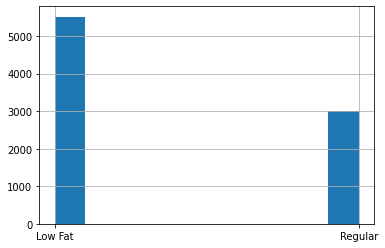

In [22]:
dt['Item_Fat_Content'].hist()

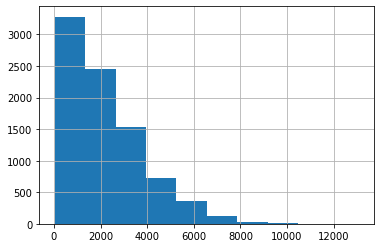

In [23]:
dt['Item_Outlet_Sales'].hist()

Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

In [26]:
import seaborn as sn 

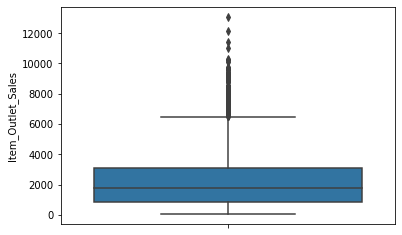

In [29]:
sn.boxplot(y='Item_Outlet_Sales', data=dt)

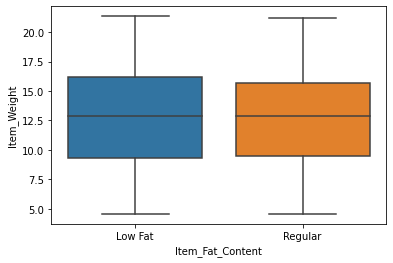

In [30]:
sn.boxplot(x='Item_Fat_Content',y='Item_Weight', data=dt)

Mapa de calor de la correlación entre las características.

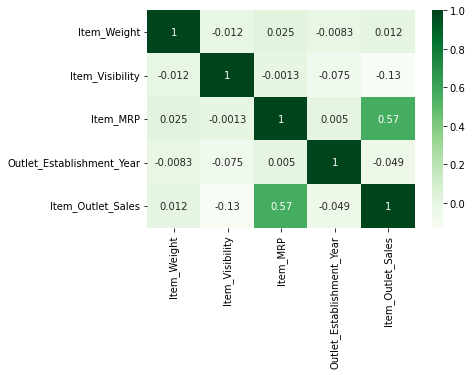

In [25]:

corr=dt.corr()
sn.heatmap(corr, cmap = 'Greens', annot = True)
#este nos permite ver las correlaciones de las columnas
#vemos que la correlación moderada se dan con Iten_MPR vs Item_Outlet_Sales, las otras son bajas 